## 3  Cambio de tamaño (resolución espacial) y Recorte ("zoom") 

#### Observación: el cambio de tamaño (en general una función resize() implica no solo multiplicar por un factor de escala, sino hacer interpolación para que no haya negros, o promediado o decimación de valores.

**Ejemplo**

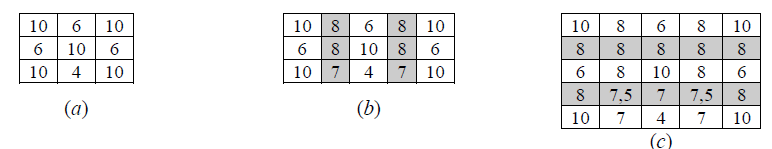

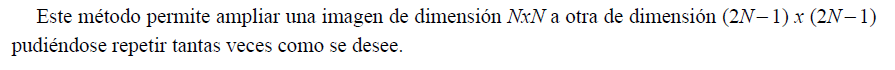

In [ ]:
import cv2
Imagen=cv2.imread('./imagenes/ojo.jpeg')
print(Imagen.shape)
Frame=cv2.resize(Imagen,(550,366))#fijo nuevo tamaño
print(Frame.shape)
cv2.imshow('Imagen original. Pulse tecla para continuar',Imagen)
cv2.waitKey(0)
cv2.imshow('Escalada, pulse tecla para cerrar',Frame)
cv2.waitKey(0)
cv2.imwrite("./imagenes/Escalada.jpg",Frame)
cv2.destroyAllWindows() #destruye las ventanas creadas

In [ ]:
import cv2
Imagen=cv2.imread('./imagenes/ojo.jpeg')
crop_img = Imagen[55:100, 63:150] # Corta (crop) [y1:y2, x1:x2]
# NOTa: Es imagen[y: y + h, x: x + w] and *not* img[x: x + w, y: y + h]
cv2.imshow("Recorte", crop_img) #muestro
cv2.imwrite("./imagenes/Recorte.jpg",crop_img) #guardo a memoria en compu


cv2.waitKey(0)
cv2.destroyAllWindows()

#### Ejercicio: abra en memoria una imagen y reescálela con tamaño 100x100

In [ ]:
import cv2
Imagen=cv2.imread('./imagenes/ojo.jpeg')
cv2.imshow("Recorte", Imagen) #muestro

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Escalado con OpenCV fijando interpolación cúbica (considera 16 vecinos)

In [ ]:
import cv2

img = cv2.imread('/media/leandro/Volumen1TB/Lean/Curso de imagenes UNQ/imagenes/ojo.jpeg')

# res1 = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
# #OR
# height, width = img.shape[:2]
# res2 = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

cv2.imshow('Cambio de tamaño1',img)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

# cv2.imshow('Cambio de tamaño2',res2)
# cv2.waitKey(0) # waits until a key is pressed
# cv2.destroyAllWindows() # destroys the window showing image

### Funciones definidas en librería PIL
### Recorte. Rotación.Cambio de tamaño.

**Rotación: Observación**
La rotación con respecto al origen de coordenadas está dada por:

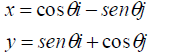

Se requiere conocer el ángulo a rotar y el centro de la rotación.

Si el ángulo rotado no es múltiplo de 90 grados, la imagen resulta recortada. Es necesario hacer alguna interpolación.


In [ ]:
import PIL
from PIL import Image

path='./imagenes/ojo.jpeg' #Utilicemos una imagen en que se vea bien la rotación
imagen=Image.open(path) #tipo imagen


recorte=(100,100,300,300) #Fijamos esquinas superior izquierda y derecha

imagenrecortada=imagen.crop(recorte)

imagenrotada=imagen.rotate(45) #Se indica el ángulo girado en grados. Giro antihorario

imagenachicada=imagen.resize((100,100))

imagenrecortada.show()
imagenrotada.show()
imagenachicada.show()


In [ ]:
#### Rotación con OpenCV
#### Conserva límites mediante la transformación warpAffine

In [ ]:
import cv2
 
#lee la imagen
img = cv2.imread('./imagenes/ojo.jpeg')
# get image height, width
(h, w) = img.shape[:2]

# calculate the center of the image
center = (w / 2, h / 2)

angle45=45 
angle90 = 90
angle180 = 180
angle270 = 270
angle30= 30
 
scale = 1 #Probar cambios de escala
 
# Perform the counter clockwise rotation holding at the center
# 90 degrees
M = cv2.getRotationMatrix2D(center, angle90, scale)
rotated90 = cv2.warpAffine(img, M, (w, h))
 
# 180 degrees
M = cv2.getRotationMatrix2D(center, angle180, scale)
rotated180 = cv2.warpAffine(img, M, (w, h))
 
# 270 degrees
M = cv2.getRotationMatrix2D(center, angle270, scale)
rotated270 = cv2.warpAffine(img, M, (w, h))
 
# 45 degrees
M = cv2.getRotationMatrix2D(center, angle45, scale)
rotated45 = cv2.warpAffine(img, M, (w, h))

# 30 degrees
M = cv2.getRotationMatrix2D(center, angle30, scale)
rotated30 = cv2.warpAffine(img, M, (w, h))

cv2.imshow('Original Image',img)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image
 
cv2.imshow('Image rotated by 90 degrees',rotated90)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image
 
cv2.imshow('Image rotated by 180 degrees',rotated180)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image
 
cv2.imshow('Image rotated by 270 degrees',rotated270)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

cv2.imshow('Image rotated by 45 degrees',rotated45)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

cv2.imshow('Image rotated by 30 degrees',rotated30)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

**Ejercicio- Usar la librería PIL**

Cargar la imagen daisy.jpg.

Mostrar tipo de dato de la imagen y de cada elemento.

Mostrar la imagen.

Convertirla en array y mostrar ahora tipo de dato.

Recortar un rectángulo en el centro. Mostrar el recorte.

Invertir los canales de color. Mostrar la imagen con el cambio de canales de color.

Oscurecer la imagen dividiendo por 2 las intensidades. Mostrar la imagen oscurecida.

Poner color negro en la zona que se recortó.


**Ejercicio**
Codificar una función que reciba una matriz y devuelva una traslación, rellenando con negros.